In [7]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
print("텐서플로 버전: {}".format(tf.__version__))
print("즉시 실행: {}".format(tf.executing_eagerly()))

텐서플로 버전: 2.4.1
즉시 실행: True


In [5]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

데이터셋이 복사된 위치: C:\Users\X0122190\.keras\datasets\iris_training.csv


In [6]:
# CSV 파일안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("특성: {}".format(feature_names))
print("레이블: {}".format(label_name))

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


In [13]:
train_dataset_fp

'C:\\Users\\X0122190\\.keras\\datasets\\iris_training.csv'

In [20]:
batch_size = 50

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [15]:
train_dataset

<PrefetchDataset shapes: (OrderedDict([(sepal_length, (None,)), (sepal_width, (None,)), (petal_length, (None,)), (petal_width, (None,))]), (None,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [21]:
features, labels = next(iter(train_dataset))

In [22]:
features


OrderedDict([('sepal_length',
              <tf.Tensor: shape=(50,), dtype=float32, numpy=
              array([7.4, 4.8, 4.9, 4.5, 6.3, 5. , 5. , 6.5, 5.7, 4.6, 6.6, 6. , 6. ,
                     5. , 5. , 6.2, 6.9, 6.3, 6. , 6.7, 6.3, 7.7, 5.2, 4.8, 5.6, 6.4,
                     5. , 5.1, 6. , 4.9, 5.8, 5.4, 6.4, 4.6, 4.9, 6.1, 5. , 6.4, 5.8,
                     4.8, 5.6, 6.9, 5.5, 4.4, 4.6, 7. , 7.7, 5.1, 5.5, 6.1],
                    dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: shape=(50,), dtype=float32, numpy=
              array([2.8, 3. , 2.4, 2.3, 2.7, 3.4, 3.5, 3. , 3. , 3.1, 3. , 2.2, 2.9,
                     3.3, 2. , 2.2, 3.2, 2.5, 3. , 3.1, 2.3, 2.6, 2.7, 3.4, 2.7, 2.7,
                     3. , 3.8, 2.7, 2.5, 2.7, 3.7, 3.2, 3.4, 3.1, 2.6, 3.4, 2.8, 2.7,
                     3.1, 2.5, 3.1, 2.4, 2.9, 3.6, 3.2, 2.8, 3.8, 2.6, 2.8],
                    dtype=float32)>),
             ('petal_length',
              <tf.Tensor: shape=(50,), dtyp

In [23]:
features['petal_length']

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([6.1, 1.4, 3.3, 1.3, 4.9, 1.6, 1.6, 5.8, 4.2, 1.5, 4.4, 5. , 4.5,
       1.4, 3.5, 4.5, 5.7, 5. , 4.8, 4.4, 4.4, 6.9, 3.9, 1.6, 4.2, 5.3,
       1.6, 1.6, 5.1, 4.5, 5.1, 1.5, 5.3, 1.4, 1.5, 5.6, 1.5, 5.6, 4.1,
       1.6, 3.9, 5.1, 3.8, 1.4, 1. , 4.7, 6.7, 1.5, 4.4, 4.7],
      dtype=float32)>

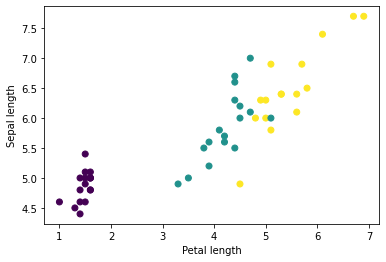

In [24]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [25]:
def pack_features_vector(features, labels):
  """특성들을 단일 배열로 묶습니다."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [26]:
train_dataset = train_dataset.map(pack_features_vector)

In [28]:
train_dataset

<MapDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int32)>